# Guide to the code and figures

## Requirements

In order to be able to run the code gracefully you will need the following Python 3.6.8 packages. Probably older versions work too, but the code has been run and tested with:

- matplotlib==3.1.1
- numpy==1.17.2
- scikit-learn==0.21.3
- torch==1.2.0+cpu
- torchvision==0.4.0+cpu
- scipy==1.3.1
- autograd==1.3
- progressbar2==3.43.1
- jupyterlab==1.1.3
- jupyterlab-server==1.0.6

You can install them easily doing:

- Linux: 
```console 
pip3 install -r requirements.txt -f https://download.pytorch.org/whl/torch_stable.html 
```
- Mac:
```console 
pip3 install -r requirements_mac.txt 
```

## Experimental Figures

In order to obtain the experimental figures you see in the article you should run the following in the `src` folder:
```console
python3 study_behavior.py --same_batch --u_func_name exp --hyperparameter 0.693 --beta_lim_max 1.45
python3 study_behavior.py --same_batch --u_func_name exp --hyperparameter 1 
python3 study_behavior.py --same_batch --u_func_name exp --hyperparameter 1.5 --beta_lim_max 0.6
python3 study_behavior.py --same_batch --u_func_name pow --hyperparameter 0.5
python3 study_behavior.py --same_batch --u_func_name pow --hyperparameter 1 --example_clusters
python3 study_behavior.py --same_batch --u_func_name pow --hyperparameter 2
```
Now the images should be stored in `results`. Depending on the h function selected and the hyperparameter they will be shown in a different folder with name `ufuncname_hyperparametervalue`.

## Theoretical figures

In order to draw the figures we need the following packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### 1. Convex IB Lagrangian isolines

The first theoretical figure we see in the article is Figure 3. This figure shows the isolines of the convex IB Lagrangian intersecting the IB curve in a deterministic scenario. Particularly, it shows the case for the exponential IB Lagrangian with $\eta=3$.

With the function `show_isolines_convex_ib` we can see those intersections for different values of the hyperparameters and choose between the power and the exponential IB Lagrangian. You can also choose the cardinality of the output tasks (now set to 10) or put an arbitrary Y entropy, and the number of betas used (now set to 4).

In [2]:
def show_isolines_convex_ib(u_func_name, hyperparameter, n_betas = 4, b_max = 1.0, card_Y = 10, HY_force = -1):
    
    # Values needed for the visualization 
    if HY_force is not -1:
        HY = HY_force
    else:
        HY = np.log2(card_Y)
    IXY = HY 
    HT = 1.5 * HY # for visualization purposes
    HX = HT # for visualization purposes
    HYX = HX - IXY
    
    # Theoretical limits of the Lagrange multiplier
    if u_func_name == 'exp':
        b_min = 1.0 / (hyperparameter * np.exp(hyperparameter * HY))
        b_max = 1.0 / hyperparameter
    elif u_func_name == 'pow':
        b_min = 1.0 / (1e-10 + (1+hyperparameter) * HY ** hyperparameter)
    
    # Creating figure space
    fig = plt.figure()
    
    # Drawing the theoretical limit bounds 
    ixt = np.linspace(0, HT, 1000)
    ity = ixt 
    plt.fill_between(ixt, 0, np.where(ity>IXY, IXY, ity), alpha = 0.5, where=(ixt < HT), color='darkorange')
    plt.plot(ixt[ixt<HT], np.where(ity>IXY, IXY, ity)[ixt<HT], alpha = 0.4, color='blue', linewidth=4)
    
    # Drawing the isolines
    betas = np.linspace(b_min, b_max, n_betas)
    cmap = cm.get_cmap('Dark2')
    colors = [cmap(c) for c in np.linspace(0,1,6)]
    space = 1 / 10
    for i,b in enumerate(betas):
        
        # Calculate the isoline for that beta
        if u_func_name == 'exp':
            xmax = - np.log(b*hyperparameter)/(hyperparameter) if b != 0 else HY
            c = xmax - b*np.exp(hyperparameter*xmax)
            line = b*np.exp(hyperparameter*ixt) + c
        elif u_func_name == 'pow':
            xmax = 1.0 / ((1+hyperparameter)*b)**(1/hyperparameter) if b != 0 else HY
            c = xmax*(1.0-b*xmax**hyperparameter)
            line = b*ixt**(1+hyperparameter) + c
            
        color = colors[i]
        plt.plot(ixt[line<HT+1], line[line<HT+1], color=color, alpha=1)
        xpos = xmax+0.3 if b!= 0 else HT*0.88
        ypos = xmax+0.1 if b!= 0 else xmax+0.1
        plt.plot(xmax, xmax, 'X', color=color, markersize=7, markeredgecolor='black')
        plt.annotate(r'$\beta = $'+str(round(b, 3)), xy = (xpos,ypos), color=color)

    plt.plot(IXY, IXY, '*', color='yellow', markersize=15, markeredgecolor='black')

    xss = np.linspace(HY,HT,10)
    for xs in xss[1:]:
        plt.plot(xs, HY, 'X', color=cmap(betas[0]), markersize=7, markeredgecolor='black')

    plt.xticks([])
    plt.yticks([])

    plt.xlabel(r'$I(X;T)$')
    plt.ylabel(r'$I(T;Y)$')

    plt.xlim([0,HT])
    plt.ylim([0,HY+0.5])
    plt.show()

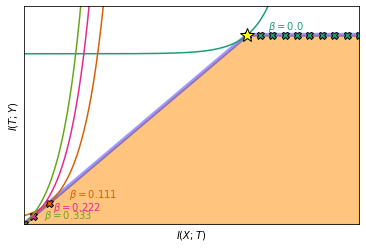

In [3]:
show_isolines_convex_ib('exp',3)

### 2. Theoretical IB plane bounds

The second theoretical figure is the theoretical bounds on the IB plane. This figure simply shows the theoretical bounds on the IB plane as explained in the article. 

With the function `show_th_bounds_IB_plane` you can obtain different figures for different values of the $Y$ entropy, $X$ entropy, $T$ entropy and $I(X;Y)$. We recommend to not alter those values since the plotting might look weird.

In [4]:
def show_th_bounds_IB_plane(HX=25, HY=17, HT=20, IXY=13):
    
    HXY = HY - IXY
    HYX = HX - IXY

    ixt = np.linspace(0,HX+5,1000)
    ity = np.linspace(0,HX+5,1000)

    plt.plot(ixt, np.ones(ixt.shape)*IXY, color = 'darkorange', linestyle="--")
    plt.plot(np.ones(ity.shape)*IXY, ity, color = 'black', linestyle=":")
    plt.plot(ixt, ity, color = 'darkorange', linestyle='--')
    plt.xlim([0,HT])
    plt.ylim([0,IXY+3])

    plt.annotate(r' $I(X;Y)$', xy=(1,IXY-1), color='darkorange')

    plt.annotate(r'$I(X;Y)$', xy=(IXY-2,IXY+2))

    plt.annotate(r' $I(X;T) \geq I(T;Y)$', xy=(IXY+2.5,IXY+1.5), color='darkorange')

    func = lambda r : np.log(r+1)**2 # Example of valid IB curve on the limits of the Pareto frontier
    eg = func(ixt)
    plt.fill_between(ixt, 0, np.where(ity>IXY, IXY, ity), alpha = 0.3, where=(ixt < HT), color='darkorange')
    plt.fill_between(ixt, 0, eg, alpha = 0.2, where=(ixt < HT), color='darkorange')
    plt.plot(ixt[ixt<HT], np.where(ity>IXY, IXY, ity)[ixt<HT], alpha = 0.4, color='red', linewidth=4)
    plt.plot(ixt[ixt<HT], eg[ixt<HT], alpha = 0.4, color='blue', linewidth=4)

    plt.plot(IXY, IXY, '*', color='yellow', markersize=15, markeredgecolor='black')

    plt.xticks([])
    plt.yticks([])

    plt.xlabel(r'$I(X;T)$')
    plt.ylabel(r'$I(T;Y)$')
    plt.show()

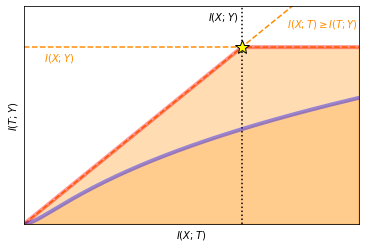

In [5]:
show_th_bounds_IB_plane()

### 3. Theoretical bijecton between $\beta_h$ and $I(X;T)$

The last theoretical figure is the bijection between the Lagrange multipliers of the convex IB Lagrangian, $\beta_h$ and the compression level obtained, $I(X;T)$.

Particularly, we show that for the power IB Lagrangian and the exponential IB Lagrangian. With the function `show_theoretical_bijection` you can choose the $h$ function, the maximum value of $\beta_{pow}$ (since the maximum value for the exponential is known) and the entropy of Y (currently to $\log_2(10)$).

In [6]:
def show_theoretical_bijection(u_func_name, b_max = 1.5, HY = np.log2(10)):
    
    # Number of elements to show
    vals = np.linspace(1,1000,1000)
    cmap = cm.get_cmap('Dark2')
    fig, ax = plt.subplots(ncols=2,figsize=(15,5))
    
    # Bijection 
    if u_func_name == 'exp':
        bijection = lambda b, h: - np.log(h*b)/h
    elif u_func_name == 'pow':
        bijection = lambda b, h: (1 / ((1+h)*b))**(1/h)
    
    # High values of the hyperparameters
    hyperparameters = np.linspace(1,10, 10)
    for i, hyperparameter in enumerate(hyperparameters):
        # Calculate the limits of beta 
        if u_func_name == 'exp':
            bmin = 1 / (hyperparameter*np.exp(hyperparameter*HY))
            bmax = 1 / hyperparameter
        elif u_func_name == 'pow':
            bmin = 1 / ((1+hyperparameter)*HY**hyperparameter)
            bmax = b_max
        betas = np.linspace(bmin, bmax, 1000)
        
        # Plot the curve
        ax[0].plot(vals, bijection(betas,hyperparameter),color=cmap(i/10),label=str(hyperparameter))
        
    ax[0].legend(ncol=2)
    ax[0].set_xlim([1,1000])
    ax[0].set_ylim([0,HY])
    ax[0].set_xticks([1,1000])
    max_name = r'$\beta_{exp,max}$' if u_func_name is 'exp' else str(bmax)
    ax[0].set_xticklabels([r'$\beta_{{{z}}}$'.format(z=u_func_name+',min'),max_name])
    ax[0].set_xlabel(r'$\beta_{{{z}}}$'.format(z=u_func_name))
    ax[0].set_ylabel(r'$I(X;T)$')
    
    # Low values of the hyperparameters
    alphas = np.linspace(0.1,1, 10)
    for i, hyperparameter in enumerate(hyperparameters):
        if u_func_name == 'exp':
            bmin = 1 / (hyperparameter*np.exp(hyperparameter*HY))
            bmax = 1 / hyperparameter
        elif u_func_name == 'pow':
            bmin = 1 / ((1+hyperparameter)*HY**hyperparameter)
            bmax = b_max
        betas = np.linspace(bmin, bmax, 1000)
        
        # Plot the curve
        ax[1].plot(vals, bijection(betas,hyperparameter),color=cmap(i/10),label=str(round(hyperparameter,2)))
        
    ax[1].legend(ncol=2)
    ax[1].set_xlim([1,1000])
    ax[1].set_ylim([0,HY])
    ax[1].set_xticks([1,1000])
    max_name = r'$\beta_{exp,max}$' if h_func_name is 'exp' else str(bmax)
    ax[1].set_xticklabels([r'$\beta_{{{z}}}$'.format(z=h_func_name+',min'),max_name])
    ax[1].set_xlabel(r'$\beta_{{{z}}}$'.format(z=h_func_name))
    ax[1].set_ylabel(r'$I(X;T)$')
    
    plt.show()

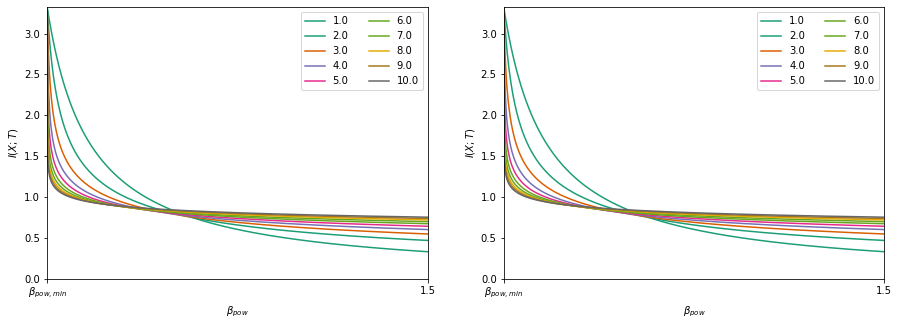

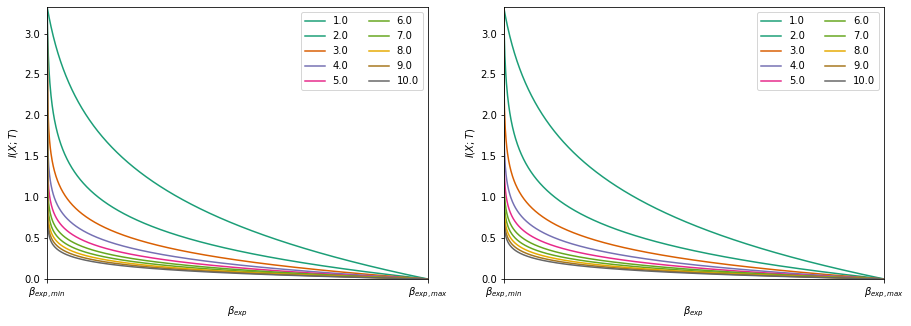

In [7]:
show_theoretical_bijection('pow',1.5)
show_theoretical_bijection('exp')